# LetsGrowMore - DataScience Task2
# Intermediate Level
# Fashad Ahmed Siddique
# Prediction using Decision Tree  Algorithm - IRIS CLASSIFICATION

Import necessary Libraries



In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Read the Data set


In [ ]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data Visualization & EDA



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


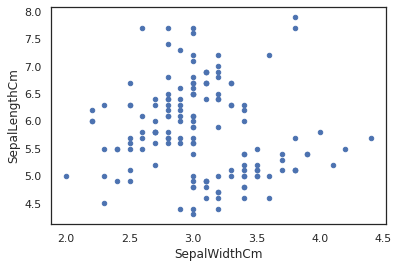

In [ ]:
sns.set(style='white', color_codes=True)
iris.plot(kind='scatter',x='SepalWidthCm', y='SepalLengthCm')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


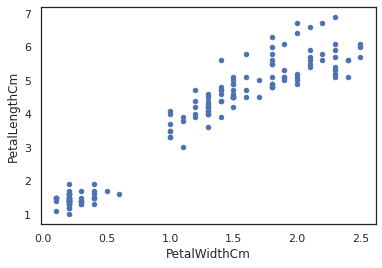

In [ ]:
iris.plot(kind='scatter',x='PetalWidthCm', y='PetalLengthCm')

In [ ]:
iris = iris.drop(['Id'],axis=1)

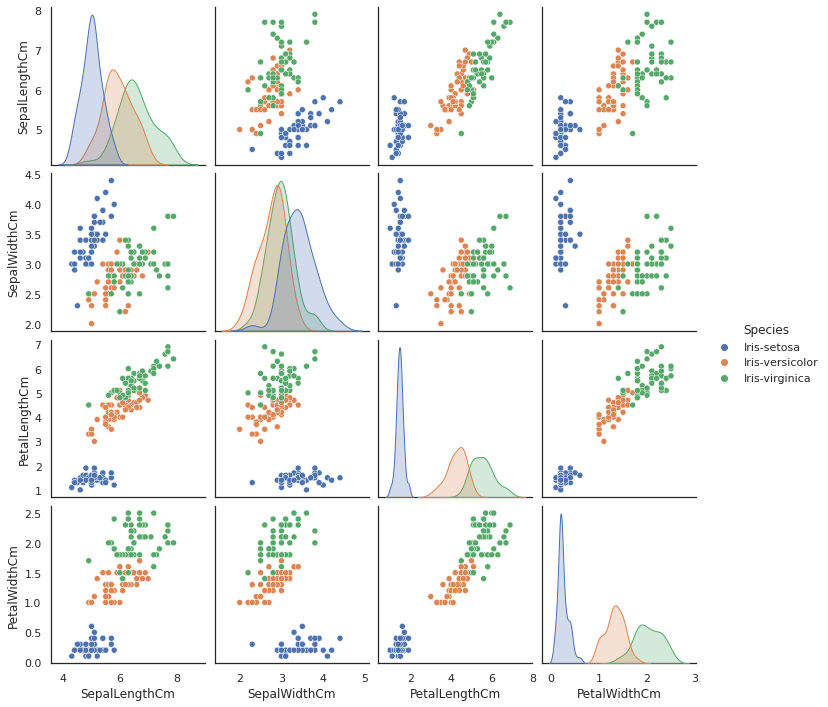

In [ ]:
sns.pairplot(data=iris, hue='Species')

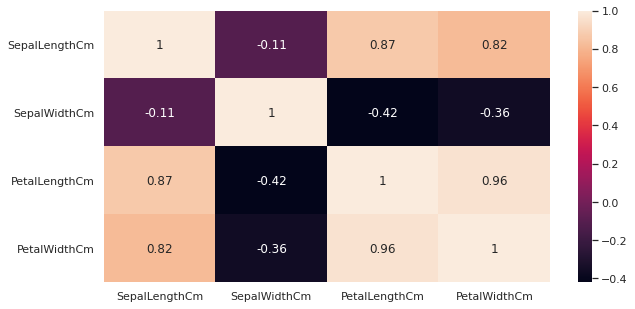

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(iris.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = iris.drop(['Species'], axis=1)
y = iris['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [ ]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction = dtree.predict(X_test)

In [ ]:
df = pd.DataFrame({'Real': y_test, 'Prediction': prediction})
df.head()

,Real,Prediction
128,Iris-virginica,Iris-virginica
11,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
15,Iris-setosa,Iris-setosa
123,Iris-virginica,Iris-virginica


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree

In [ ]:
print(accuracy_score(y_test,prediction)*100)

95.55555555555556


Decision Tree


[Text(312.48, 391.392, 'Petal Width <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]\nclass = Versicolor'),
 Text(234.36, 304.416, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Setosa'),
 Text(390.6, 304.416, 'Petal Width <= 1.65\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]\nclass = Versicolor'),
 Text(156.24, 217.44, 'Petal Length <= 5.0\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]\nclass = Versicolor'),
 Text(78.12, 130.464, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = Versicolor'),
 Text(234.36, 130.464, 'Sepal Length <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Virginica'),
 Text(156.24, 43.488, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Versicolor'),
 Text(312.48, 43.488, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Virginica'),
 Text(624.96, 217.44, 'Petal Length <= 4.85\ngini = 0.064\nsamples = 30\nvalue = [0, 1, 29]\nclass = Virginica'),
 Text(546.84, 130.464, 'Sepal Width <= 3.1\ngini = 0.375\nsamples = 4\n

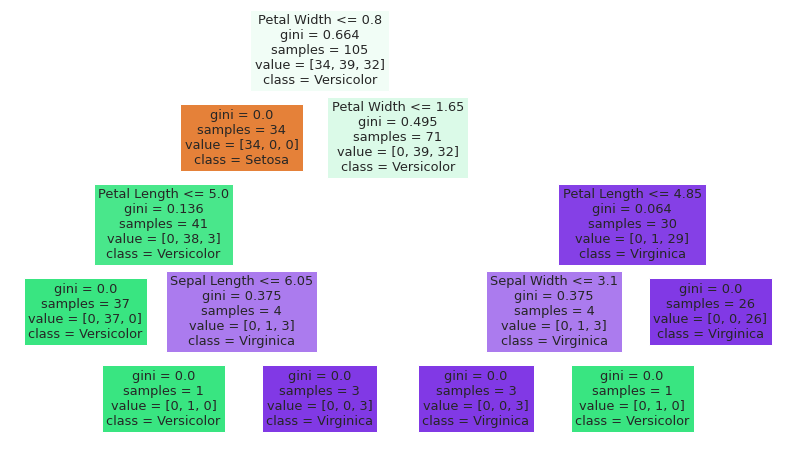

In [ ]:
plt.figure(figsize=(14,8))
dimen_arr = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
flow_arr = ["Setosa", "Versicolor", "Virginica"]
plot_tree(dtree,feature_names = dimen_arr, class_names = flow_arr , filled = True)

[Text(390.6, 398.64, 'Petal Length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Setosa'),
 Text(330.50769230769237, 326.15999999999997, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Setosa'),
 Text(450.69230769230774, 326.15999999999997, 'Petal Width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Versicolor'),
 Text(240.3692307692308, 253.67999999999998, 'Petal Length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Versicolor'),
 Text(120.1846153846154, 181.2, 'Petal Width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Versicolor'),
 Text(60.0923076923077, 108.71999999999997, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Versicolor'),
 Text(180.27692307692308, 108.71999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(360.55384615384617, 181.2, 'Petal Width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(300.4615384615385, 108.

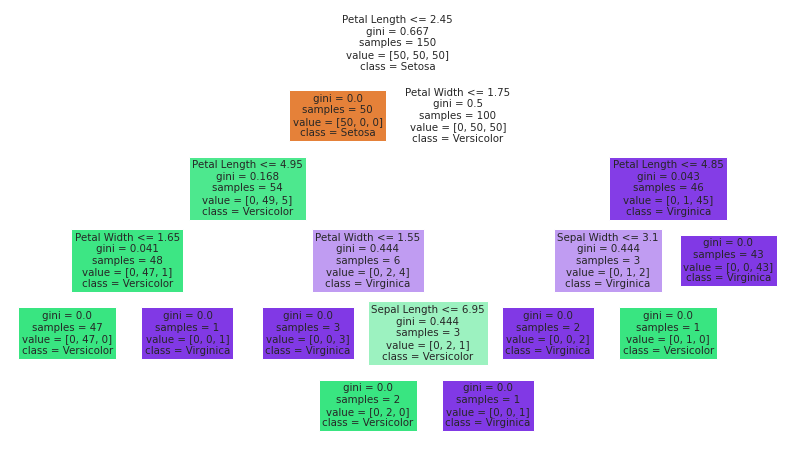

In [ ]:

model = DecisionTreeClassifier().fit(X,y)

# pred = dtree.predict([[6.1,3.2,5.3,1.4]])

plt.figure(figsize=(14,8))

plot_tree(model,feature_names = dimen_arr, class_names = flow_arr , filled = True)